In [66]:
pip install prince

In [67]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from prince import MCA
from sklearn.preprocessing import StandardScaler

In [68]:
df = pd.read_csv('Startups.csv')

Começando a análise exploratória dos dados

In [69]:
df.columns

Index(['Company', 'Satus', 'Year Founded', 'Mapping Location', 'Description',
       'Categories', 'Founders', 'Y Combinator Year', 'Y Combinator Session',
       'Investors', 'Amounts raised in different funding rounds',
       'Office Address', 'Headquarters (City)', 'Headquarters (US State)',
       'Headquarters (Country)', 'Logo', 'Seed-DB / Mattermark Profile',
       'Crunchbase / Angel List Profile', 'Website'],
      dtype='object')

In [70]:
df

,Company,Satus,Year Founded,Mapping Location,Description,Categories,Founders,Y Combinator Year,Y Combinator Session,Investors,Amounts raised in different funding rounds,Office Address,Headquarters (City),Headquarters (US State),Headquarters (Country),Logo,Seed-DB / Mattermark Profile,Crunchbase / Angel List Profile,Website
0,Curebit,Operating,2010.0,San Francisco - California - USA,Talkable is a social referral platform for onl...,"E-Commerce, Analytics, Internet, Marketing, So...","Allan Grant, Dominic Coryell, Jeff Yee, Nori Y...",2011,Winter,"500 Startups, Dharmesh Shah, Alex Lloyd, Auren...","$1200000, undisclosed amount","290 Division St, #405, San Francisco, Californ...",San Francisco,California,USA,http://a5.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/curebit,https://www.talkable.com
1,Goldbely,Operating,NaN,San Francisco - California - USA,Goldbely is an e-commerce site for buying and ...,"Social, E-Commerce","Joe Ariel, Joel Gillman, Trevor Stow, Vanessa ...",2013,Winter,"500 Startups, Funders Club, Dave McClure, Tim ...","$3,000,000","1 Bluxome Street, San Francisco, California, USA",San Francisco,California,USA,http://a3.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/goldbely,http://www.goldbely.com
2,theDailyMuse,Operating,2011.0,New York City - New York - USA,The Daily Muse is a job search platform offeri...,NaN,"Alex Cavoulacos, Kathryn Minshew, Melissa McCr...",2012,Winter,"500 Startups, Great Oaks Venture Capital, Grea...","$2800000, $2100000, $1200000, $1200000","33 WEST 26TH STREET, #2, New York, New York, USA",New York City,New York,USA,http://a5.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/the-dai...,http://www.thedailymuse.com
3,Zencoder,Exited,NaN,San Francisco - California - USA,Zencoder is web-based video encoding SaaS desi...,"SaaS, Cloud Computing, Audio, Web Development,...","Brandon Arbini, Jon Dahl, Steve Heffernan",2010,Winter,"500 Startups, Matt Cutts, Ignition Partners, J...","$2000000, undisclosed amount","San Francisco, CA, 94103, USA",San Francisco,California,USA,http://a1.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/zencoder,http://zencoder.com
4,GinzaMetrics,Operating,NaN,San Francisco - California - USA,GinzaMetrics offers an SEO and content marketi...,"Enterprises, E-Commerce, Analytics, SEO, Enter...",Ray Grieselhuber,2010,Summer,"500 Startups, 500 Startups, Venture51, Jeff Mi...","undisclosed amount, $1300000, $400000, $14000","25 Taylor Street, San Francisco, CA, 94103, USA",San Francisco,California,USA,http://a2.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/ginzame...,http://ginzametrics.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,MailGun,Exited,2010.0,Mountain View - California - USA,Mailgun offers APIs that allow users to send r...,"Services, Email, Messaging",NaN,2011,Winter,"Yuri Milner, Paul Buchheit, SV Angel, Geoff R...","$1100000, undisclosed amount","600 N. Whisman Road, Suite 33, Mountain View, ...",Mountain View,California,USA,http://a3.images.crunchbase.com/image/upload/c...,http://www.seed-db.com/companies/view?companyi...,http://www.crunchbase.com/organization/mailgun,http://www.mailgun.net
684,Balanced Payments,Operating,2010.0,San Francisco - California - USA,Balanced is a payment system allowing marketpl...,"Peer-to-Peer, Mobile, Payments, E-Commerce","Jareau Wade, Mahmoud Abdelkader, Matin Tamizi",2011,Winter,"Yishan Wong, SV Angel, Ashton Kutcher, Brian C...","undisclosed amount, $2000000, $1400000, $150000","San Francisco, CA, 94103, USA",San Francisco,California,USA,http://a4.images.crunchbase.com/image/upload/

Tirando colunas com informações que não serão uteis

In [71]:
df = df.drop(['Logo', 'Seed-DB / Mattermark Profile','Crunchbase / Angel List Profile', 'Website','Description','Office Address','Mapping Location','Founders','Investors'], axis='columns')

Analisando os valores e quantidade de repetições deles por coluna.

In [72]:
for i in df.columns:

    counts = df[i].value_counts()
    print(f"Valores únicos na coluna '{i}':")
    print(counts)

Valores únicos na coluna 'Company':
Curebit        1
Reble          1
Prim           1
ProductHunt    1
Profig         1
              ..
AirHelp        1
AirPair        1
AnyLeaf        1
Anyvite        1
ZeroCater      1
Name: Company, Length: 688, dtype: int64
Valores únicos na coluna 'Satus':
Operating    523
Dead          85
Exited        80
Name: Satus, dtype: int64
Valores únicos na coluna 'Year Founded':
2012.0    28
2013.0    26
2010.0    24
2011.0    24
2009.0    15
2007.0    12
2008.0     9
2014.0     5
2006.0     4
2005.0     2
2000.0     1
1996.0     1
Name: Year Founded, dtype: int64
Valores únicos na coluna 'Categories':
Curated Web                                              50
Software                                                 33
Mobile                                                   17
E-Commerce                                               13
Advertising                                              13
                                                        

Verificando a quantidade de valores nulos por coluna

In [73]:
for i in df.columns:
  valor_de_nulos = (df[i].isna()).sum()
  print(f"Quantidade de valores nulos na coluna '{i}':'{valor_de_nulos}'")

Quantidade de valores nulos na coluna 'Company':'0'
Quantidade de valores nulos na coluna 'Satus':'0'
Quantidade de valores nulos na coluna 'Year Founded':'537'
Quantidade de valores nulos na coluna 'Categories':'141'
Quantidade de valores nulos na coluna 'Y Combinator Year':'0'
Quantidade de valores nulos na coluna 'Y Combinator Session':'0'
Quantidade de valores nulos na coluna 'Amounts raised in different funding rounds':'118'
Quantidade de valores nulos na coluna 'Headquarters (City)':'208'
Quantidade de valores nulos na coluna 'Headquarters (US State)':'237'
Quantidade de valores nulos na coluna 'Headquarters (Country)':'200'


Começando o tratamento trocando os valores nan pela moda dos valores

In [74]:
for i in df.columns:
  valor_de_nulos = (df[i].isna()).sum()
  if valor_de_nulos > 0:
    modas = df[i].mode()
    valor_moda=modas[0]
    df[i] = df[i].fillna(valor_moda)

In [75]:
for i in df.columns:
  valor_de_nulos = (df[i].isna()).sum()
  print(f"Quantidade de valores nulos na coluna '{i}':'{valor_de_nulos}'")

Quantidade de valores nulos na coluna 'Company':'0'
Quantidade de valores nulos na coluna 'Satus':'0'
Quantidade de valores nulos na coluna 'Year Founded':'0'
Quantidade de valores nulos na coluna 'Categories':'0'
Quantidade de valores nulos na coluna 'Y Combinator Year':'0'
Quantidade de valores nulos na coluna 'Y Combinator Session':'0'
Quantidade de valores nulos na coluna 'Amounts raised in different funding rounds':'0'
Quantidade de valores nulos na coluna 'Headquarters (City)':'0'
Quantidade de valores nulos na coluna 'Headquarters (US State)':'0'
Quantidade de valores nulos na coluna 'Headquarters (Country)':'0'


Olhando novamente a quantidade de repetições de cada valor por coluna

In [76]:
for i in df.columns:

    counts = df[i].value_counts()
    print(f"Valores únicos na coluna '{i}':")
    print(counts)

Valores únicos na coluna 'Company':
Curebit        1
Reble          1
Prim           1
ProductHunt    1
Profig         1
              ..
AirHelp        1
AirPair        1
AnyLeaf        1
Anyvite        1
ZeroCater      1
Name: Company, Length: 688, dtype: int64
Valores únicos na coluna 'Satus':
Operating    523
Dead          85
Exited        80
Name: Satus, dtype: int64
Valores únicos na coluna 'Year Founded':
2012.0    565
2013.0     26
2010.0     24
2011.0     24
2009.0     15
2007.0     12
2008.0      9
2014.0      5
2006.0      4
2005.0      2
2000.0      1
1996.0      1
Name: Year Founded, dtype: int64
Valores únicos na coluna 'Categories':
Curated Web                                              191
Software                                                  33
Mobile                                                    17
E-Commerce                                                13
Advertising                                               13
                                       

Começando o tratamento da coluna 'Amounts raised in different funding rounds', que poderar ser útil contudo os valores estão agrupados e não estão tratados

In [77]:
df['Amounts raised in different funding rounds'] = df['Amounts raised in different funding rounds'].str.split(',')

In [78]:
valores_separados = df.explode('Amounts raised in different funding rounds')

In [79]:
valores_separados['Amounts raised in different funding rounds'] = valores_separados['Amounts raised in different funding rounds'].str.strip()

In [80]:
df

,Company,Satus,Year Founded,Categories,Y Combinator Year,Y Combinator Session,Amounts raised in different funding rounds,Headquarters (City),Headquarters (US State),Headquarters (Country)
0,Curebit,Operating,2010.0,"E-Commerce, Analytics, Internet, Marketing, So...",2011,Winter,"[$1200000, undisclosed amount]",San Francisco,California,USA
1,Goldbely,Operating,2012.0,"Social, E-Commerce",2013,Winter,"[$3, 000, 000]",San Francisco,California,USA
2,theDailyMuse,Operating,2011.0,Curated Web,2012,Winter,"[$2800000, $2100000, $1200000, $1200000]",New York City,New York,USA
3,Zencoder,Exited,2012.0,"SaaS, Cloud Computing, Audio, Web Development,...",2010,Winter,"[$2000000, undisclosed amount]",San Francisco,California,USA
4,GinzaMetrics,Operating,2012.0,"Enterprises, E-Commerce, Analytics, SEO, Enter...",2010,Summer,"[undisclosed amount, $1300000, $400000, $14...",San Francisco,California,USA
...,...,...,...,...,...,...,...,...,...,...
683,MailGun,Exited,2010.0,"Services, Email, Messaging",2011,Winter,"[$1100000, undisclosed amount]",Mountain View,California,USA
684,Balanced Payments,Operating,2010.0,"Peer-to-Peer, Mobile, Payments, E-Commerce",2011,Winter,"[undisclosed amount, $2000000, $1400000, $1...",San Francisco,California,USA
685,Bridge,Operating,2010.0,Public Relations,2011,Winter,[undisclosed amount],Berkley,California,USA
686,Clever,Operating,2012.0,"Big Data, Data Integration, Education",2012,Summer,"[$10300000, $3000000, $20000]",San Francisco,California,USA


In [81]:
valores_separados

,Company,Satus,Year Founded,Categories,Y Combinator Year,Y Combinator Session,Amounts raised in different funding rounds,Headquarters (City),Headquarters (US State),Headquarters (Country)
0,Curebit,Operating,2010.0,"E-Commerce, Analytics, Internet, Marketing, So...",2011,Winter,$1200000,San Francisco,California,USA
0,Curebit,Operating,2010.0,"E-Commerce, Analytics, Internet, Marketing, So...",2011,Winter,undisclosed amount,San Francisco,California,USA
1,Goldbely,Operating,2012.0,"Social, E-Commerce",2013,Winter,$3,San Francisco,California,USA
1,Goldbely,Operating,2012.0,"Social, E-Commerce",2013,Winter,000,San Francisco,California,USA
1,Goldbely,Operating,2012.0,"Social, E-Commerce",2013,Winter,000,San Francisco,California,USA
...,...,...,...,...,...,...,...,...,...,...
686,Clever,Operating,2012.0,"Big Data, Data Integration, Education",2012,Summer,$3000000,San Francisco,California,USA
686,Clever,Operating,2012.0,"Big Data, Data Integration, Education",2012,Summer,$20000,San Francisco,California,USA
687,ZeroCater,Operating,2012.0,Hospitality,2011,Winter,$1,"San Francisco, New York City","California, New York",USA
687,ZeroCater,Operating,2012.0,Hospitality,2011,Winter,500,"San Francisco, New York City","California, New York",USA


Tratando os valores não divulgados e outras caracteristicas de formatação que me atrapalharam

In [82]:
valores_separados['Amounts raised in different funding rounds'] = valores_separados['Amounts raised in different funding rounds'].replace('undisclosed amount','0')

In [83]:
valores_separados

,Company,Satus,Year Founded,Categories,Y Combinator Year,Y Combinator Session,Amounts raised in different funding rounds,Headquarters (City),Headquarters (US State),Headquarters (Country)
0,Curebit,Operating,2010.0,"E-Commerce, Analytics, Internet, Marketing, So...",2011,Winter,$1200000,San Francisco,California,USA
0,Curebit,Operating,2010.0,"E-Commerce, Analytics, Internet, Marketing, So...",2011,Winter,0,San Francisco,California,USA
1,Goldbely,Operating,2012.0,"Social, E-Commerce",2013,Winter,$3,San Francisco,California,USA
1,Goldbely,Operating,2012.0,"Social, E-Commerce",2013,Winter,000,San Francisco,California,USA
1,Goldbely,Operating,2012.0,"Social, E-Commerce",2013,Winter,000,San Francisco,California,USA
...,...,...,...,...,...,...,...,...,...,...
686,Clever,Operating,2012.0,"Big Data, Data Integration, Education",2012,Summer,$3000000,San Francisco,California,USA
686,Clever,Operating,2012.0,"Big Data, Data Integration, Education",2012,Summer,$20000,San Francisco,California,USA
687,ZeroCater,Operating,2012.0,Hospitality,2011,Winter,$1,"San Francisco, New York City","California, New York",USA
687,ZeroCater,Operating,2012.0,Hospitality,2011,Winter,500,"San Francisco, New York City","California, New York",USA


In [84]:
valores_separados['Amounts raised in different funding rounds'] = valores_separados['Amounts raised in different funding rounds'].str.replace('$','')

In [85]:
valores_separados['Amounts raised in different funding rounds'] = valores_separados['Amounts raised in different funding rounds'].astype(float)

In [86]:
grupos_valores = valores_separados.groupby('Company')['Amounts raised in different funding rounds']


In [87]:
valores_somados = grupos_valores.sum().reset_index()

Finalmente com os valores agrupados por companhia e somados, tenho o faturamento total de cada startup o que eu validei que seria util.

In [88]:
valores_somados

,Company,Amounts raised in different funding rounds
0,1000Memories,2515000.0
1,140bets,500.0
2,280 North,250000.0
3,42,0.0
4,42floors,17400000.0
...,...,...
683,imgfave,0.0
684,ixi-play,0.0
685,reMail,0.0
686,theDailyMuse,7300000.0


Reorganizando o df para poder colocar a nova coluna

In [89]:
df = df.sort_values(by='Company',ignore_index=True)

In [90]:
df = pd.merge(df,valores_somados[['Company', 'Amounts raised in different funding rounds']], on='Company', how='left')

In [91]:
df

,Company,Satus,Year Founded,Categories,Y Combinator Year,Y Combinator Session,Amounts raised in different funding rounds_x,Headquarters (City),Headquarters (US State),Headquarters (Country),Amounts raised in different funding rounds_y
0,1000Memories,Exited,2012.0,Curated Web,2010,Summer,"[$2500000, $15000]",San Francisco,California,USA,2515000.0
1,140bets,Operating,2010.0,"Entertainment, Sports, Real Time, Social Media...",2010,Winter,"[$500, 000]",Santa Monica,California,USA,500.0
2,280 North,Exited,2012.0,Presentations Software,2008,Winter,"[$250000, undisclosed amount]",San Francisco,California,USA,250000.0
3,42,Operating,2012.0,Enterprise Software,2014,Winter,[undisclosed amount],San Francisco,California,USA,0.0
4,42floors,Operating,2012.0,"Commerce, Real Estate",2012,Winter,"[$12000000, $5000000, $400000, undisclosed ...",San Francisco,California,USA,17400000.0
...,...,...,...,...,...,...,...,...,...,...,...
683,imgfave,Operating,2012.0,Curated Web,2012,Summer,[undisclosed amount],San Francisco,California,USA,0.0
684,ixi-play,Operating,2012.0,Hardware + Software,2013,Summer,[undisclosed amount],San Francisco,California,USA,0.0
685,reMail,Exited,2012.0,Messaging,2009,Winter,[undisclosed amount],San Francisco,California,USA,0.0
686,theDailyMuse,Operating,2011.0,Curated Web,2012,Winter,"[$2800000, $2100000, $1200000, $1200000]",New York City,New York,USA,7300000.0


In [92]:
df = df.drop(['Amounts raised in different funding rounds_x'], axis='columns')

In [93]:
df = df.rename(columns={'Amounts raised in different funding rounds_y': 'Faturamento_total'})

In [94]:
df

,Company,Satus,Year Founded,Categories,Y Combinator Year,Y Combinator Session,Headquarters (City),Headquarters (US State),Headquarters (Country),Faturamento_total
0,1000Memories,Exited,2012.0,Curated Web,2010,Summer,San Francisco,California,USA,2515000.0
1,140bets,Operating,2010.0,"Entertainment, Sports, Real Time, Social Media...",2010,Winter,Santa Monica,California,USA,500.0
2,280 North,Exited,2012.0,Presentations Software,2008,Winter,San Francisco,California,USA,250000.0
3,42,Operating,2012.0,Enterprise Software,2014,Winter,San Francisco,California,USA,0.0
4,42floors,Operating,2012.0,"Commerce, Real Estate",2012,Winter,San Francisco,California,USA,17400000.0
...,...,...,...,...,...,...,...,...,...,...
683,imgfave,Operating,2012.0,Curated Web,2012,Summer,San Francisco,California,USA,0.0
684,ixi-play,Operating,2012.0,Hardware + Software,2013,Summer,San Francisco,California,USA,0.0
685,reMail,Exited,2012.0,Messaging,2009,Winter,San Francisco,California,USA,0.0
686,theDailyMuse,Operating,2011.0,Curated Web,2012,Winter,New York City,New York,USA,7300000.0


Tratamento dos outros dados: como são dados de classificação especifica iremos aplicar o hot in code em todas as colunas com exceção da colunas status que será nosso target e irei atribuir zero tanto para startup com valor = dead, quanto para valores = exited, pois quero predizer se uma startup está operando ou não

In [95]:
df = df.rename(columns={'Satus':'Status'})

In [96]:
df

,Company,Status,Year Founded,Categories,Y Combinator Year,Y Combinator Session,Headquarters (City),Headquarters (US State),Headquarters (Country),Faturamento_total
0,1000Memories,Exited,2012.0,Curated Web,2010,Summer,San Francisco,California,USA,2515000.0
1,140bets,Operating,2010.0,"Entertainment, Sports, Real Time, Social Media...",2010,Winter,Santa Monica,California,USA,500.0
2,280 North,Exited,2012.0,Presentations Software,2008,Winter,San Francisco,California,USA,250000.0
3,42,Operating,2012.0,Enterprise Software,2014,Winter,San Francisco,California,USA,0.0
4,42floors,Operating,2012.0,"Commerce, Real Estate",2012,Winter,San Francisco,California,USA,17400000.0
...,...,...,...,...,...,...,...,...,...,...
683,imgfave,Operating,2012.0,Curated Web,2012,Summer,San Francisco,California,USA,0.0
684,ixi-play,Operating,2012.0,Hardware + Software,2013,Summer,San Francisco,California,USA,0.0
685,reMail,Exited,2012.0,Messaging,2009,Winter,San Francisco,California,USA,0.0
686,theDailyMuse,Operating,2011.0,Curated Web,2012,Winter,New York City,New York,USA,7300000.0


In [97]:
df['Status'] = df['Status'].replace('Dead',0)
df['Status'] = df['Status'].replace('Exited',0)
df['Status'] = df['Status'].replace('Operating',1)


In [98]:
colunas_para_dummies = ['Year Founded', 'Headquarters (City)', 'Headquarters (US State)', 'Headquarters (Country)', 'Categories', 'Y Combinator Year', 'Y Combinator Session']
df_hotInCode = pd.get_dummies(df[colunas_para_dummies])

In [99]:
df_hotInCode

,Year Founded,Y Combinator Year,Headquarters (City)_Ann Arbor,Headquarters (City)_Arlington Heights,Headquarters (City)_Atherton,Headquarters (City)_Atlanta,Headquarters (City)_Austin,Headquarters (City)_Berkeley,Headquarters (City)_Berkley,Headquarters (City)_Berlin,...,"Categories_Web Development, Enterprise Software","Categories_Web Development, Events, Curated Web","Categories_Web Development, Games","Categories_Web Development, Web Design, Curated Web",Categories_Web Hosting,"Categories_Web Tools, Content, Curated Web",Categories_Weddings,"Categories_Wireless, Sales and Marketing, Proximity, Internet, M2M, Mobile, Software, Tools, Navigation, Location Based Services, Mobile, Retail, Big Data, Sensors, Analytics",Y Combinator Session_Summer,Y Combinator Session_Winter
0,2012.0,2010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2010.0,2010,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2012.0,2008,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2012.0,2014,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2012.0,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683,2012.0,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
684,2012.0,2013,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
685,2012.0,2009,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
686,2011.0,2012,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Reduzir a dimensionalidade deste monstro com MCA

In [101]:
mca = MCA(n_components=6)
mca.fit(df_hotInCode)
mca_results = mca.transform(df_hotInCode)

In [102]:
mca_results

,0,1,2,3,4,5
0,-0.042242,-0.049079,0.016675,0.007011,-0.005401,0.004866
1,-0.007962,0.008449,-0.062298,-0.068629,0.001009,-0.065721
2,-0.016888,-0.034545,-0.021014,-0.031722,0.041723,-0.047284
3,-0.017641,-0.017285,-0.013922,-0.039007,0.014594,-0.004743
4,-0.041839,-0.033526,-0.021388,-0.037153,0.017541,-0.027971
...,...,...,...,...,...,...
683,-0.038255,-0.043292,0.012985,0.007916,-0.007805,0.001377
684,-0.030440,-0.036277,0.014980,0.016597,-0.006287,0.015871
685,-0.033182,-0.029823,-0.006787,-0.001689,0.035004,0.006900
686,0.168005,0.046606,-0.079778,-0.000801,-0.030941,-0.051625


tirando agora as colunas não tratadas e a coluna Company pq o nome só serve para overfitar

In [103]:
df.columns

Index(['Company', 'Status', 'Year Founded', 'Categories', 'Y Combinator Year',
       'Y Combinator Session', 'Headquarters (City)',
       'Headquarters (US State)', 'Headquarters (Country)',
       'Faturamento_total'],
      dtype='object')

In [104]:
df = df.drop(['Company','Year Founded', 'Categories', 'Y Combinator Year',
       'Y Combinator Session', 'Headquarters (City)',
       'Headquarters (US State)', 'Headquarters (Country)'],axis='columns')

In [105]:
df = pd.concat([df,mca_results],axis=1)

In [106]:
normalizar = df['Faturamento_total']


In [107]:
normalizar = pd.DataFrame(normalizar)

In [108]:
normalizar

,Faturamento_total
0,2515000.0
1,500.0
2,250000.0
3,0.0
4,17400000.0
...,...
683,0.0
684,0.0
685,0.0
686,7300000.0


In [109]:
scaler = StandardScaler()
model = scaler.fit(normalizar)
scaled_data = model.transform(normalizar)

In [110]:
scaled_data

array([[-5.50855345e-02],
       [-1.02870511e-01],
       [-9.81290705e-02],
       [-1.02880013e-01],
       [ 2.27785562e-01],
       [ 1.42268603e-01],
       [-1.02879785e-01],
       [-1.02880013e-01],
       [-1.02880013e-01],
       [-1.00871314e-01],
       [-4.96694604e-02],
       [-1.02880013e-01],
       [-1.02880013e-01],
       [-9.39482414e-02],
       [-9.61336748e-02],
       [-8.59666586e-02],
       [ 1.64071504e-03],
       [-6.48724753e-02],
       [ 1.50016954e+01],
       [-1.02880013e-01],
       [-1.02880013e-01],
       [-1.02880013e-01],
       [ 6.65252317e-01],
       [-4.06041557e-03],
       [-4.96694604e-02],
       [-6.48724753e-02],
       [-1.02879975e-01],
       [-3.10457671e-02],
       [-9.80340517e-02],
       [-1.02880013e-01],
       [-1.02880013e-01],
       [-1.02880013e-01],
       [ 9.24222251e-03],
       [-1.02880013e-01],
       [-1.02879728e-01],
       [-1.02880013e-01],
       [-8.92923181e-02],
       [-6.29720985e-02],
       [-1.0

In [111]:
faturamento_normalizado = pd.DataFrame(scaled_data)

Organizando alguns detalhes para o df final

In [112]:
faturamento_normalizado = faturamento_normalizado.rename(columns={0:"Faturamento"})

In [113]:
faturamento_normalizado

,Faturamento
0,-0.055086
1,-0.102871
2,-0.098129
3,-0.102880
4,0.227786
...,...
683,-0.102880
684,-0.102880
685,-0.102880
686,0.035847


In [114]:
df = df.drop(['Faturamento_total'],axis=1)

In [115]:
df = pd.concat([df,faturamento_normalizado],axis=1)

In [116]:
df = df.rename(columns={0:'field_0',1:'field_1',2:'field_2',3:'field_3',4:'field_4',5:'field_5'})

In [117]:
df

,Status,field_0,field_1,field_2,field_3,field_4,field_5,Faturamento
0,0,-0.042242,-0.049079,0.016675,0.007011,-0.005401,0.004866,-0.055086
1,1,-0.007962,0.008449,-0.062298,-0.068629,0.001009,-0.065721,-0.102871
2,0,-0.016888,-0.034545,-0.021014,-0.031722,0.041723,-0.047284,-0.098129
3,1,-0.017641,-0.017285,-0.013922,-0.039007,0.014594,-0.004743,-0.102880
4,1,-0.041839,-0.033526,-0.021388,-0.037153,0.017541,-0.027971,0.227786
...,...,...,...,...,...,...,...,...
683,1,-0.038255,-0.043292,0.012985,0.007916,-0.007805,0.001377,-0.102880
684,1,-0.030440,-0.036277,0.014980,0.016597,-0.006287,0.015871,-0.102880
685,0,-0.033182,-0.029823,-0.006787,-0.001689,0.035004,0.006900,-0.102880
686,1,0.168005,0.046606,-0.079778,-0.000801,-0.030941,-0.051625,0.035847


Com o tratamento dos dados finalizados irei aplicar o autoiml e finalizar avaliando o modelo e gerando arquivos que serão uteis para o resto da ponderada

In [118]:
!pip3 install pycaret[full]

In [119]:
from pycaret.classification import *
s = setup(df, target = 'Status')

,Description,Value
0,Session id,8392
1,Target,Status
2,Target type,Binary
3,Original data shape,"(688, 8)"
4,Transformed data shape,"(688, 8)"
5,Transformed train set shape,"(481, 8)"
6,Transformed test set shape,"(207, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [120]:
melhor_modelo = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.7649,0.7369,0.9126,0.8050,0.8550,0.2420,0.2630,3.7890
dummy,Dummy Classifier,0.7609,0.5000,1.0000,0.7609,0.8642,0.0000,0.0000,0.1240
lr,Logistic Regression,0.7588,0.6125,0.9973,0.7604,0.8629,-0.0040,-0.0080,0.2190
ridge,Ridge Classifier,0.7588,0.0000,0.9946,0.7616,0.8625,0.0050,0.0064,0.1460
gbc,Gradient Boosting Classifier,0.7588,0.7255,0.8992,0.8084,0.8501,0.2348,0.2506,1.1330
ada,Ada Boost Classifier,0.7567,0.6601,0.9102,0.7992,0.8498,0.2127,0.2495,1.1830
lightgbm,Light Gradient Boosting Machine,0.7547,0.7264,0.8853,0.8105,0.8455,0.2487,0.2606,0.3710
xgboost,Extreme Gradient Boosting,0.7546,0.7310,0.8769,0.8154,0.8437,0.2618,0.2717,0.5400
svm,SVM - Linear Kernel,0.7505,0.0000,0.9811,0.7608,0.8566,-0.0015,-0.0026,0.1630
et,Extra Trees Classifier,0.7504,0.7036,0.8854,0.8071,0.8432,0.2275,0.2417,1.6590


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [121]:
melhor_modelo

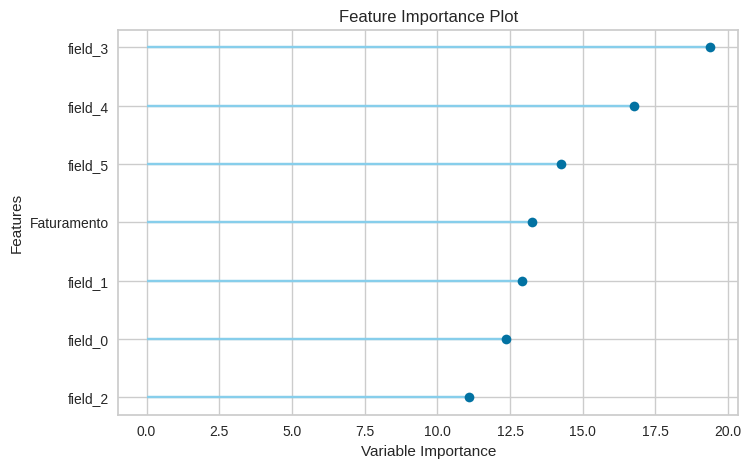

In [122]:
evaluate_model(melhor_modelo)

In [123]:
save_model(melhor_modelo,'melhor_modelo')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['field_0', 'field_1', 'field_2',
                                              'field_3', 'field_4', 'field_5',
                                              'Faturamento'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('categorical_imputer',
                  T

In [124]:
create_api(melhor_modelo,"Api")

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python Api.py


In [125]:
create_docker('Api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            
